<a href="https://colab.research.google.com/github/JensBlack/tutorials/blob/main/intro_analysing_pose_estimation_multidlc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#import 
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    %pip install numpy pandas matplotlib
finally:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

In [47]:
def load_file_multidlc(filename, report = True):
    f  = pd.read_csv(filename, header = [0,1,2,3], index_col = 0)

    clm_names = np.array(f.columns)
    scorer = np.unique(f.columns.get_level_values(0))
    animals = np.unique(f.columns.get_level_values(1))
    bodyparts = np.unique(f.columns.get_level_values(2))
    coords = np.unique(f.columns.get_level_values(3))
    #to align the format of both single and multi animal dlc output, drop the first column
    f = f.droplevel(0, axis = 1)

    if report:
      print("Filename: ", filename)
      print('DATA INFO: \n')
      print("Scorer: ", scorer)
      print(f"Animals: ", ', '.join(animals))
      print(f"Bodyparts/keypoints: ", ", ".join(bodyparts))
      print(f"Coordinates/Likelihood: ", ", ".join(coords))
      print("Length: ", f.shape[0], " frames")
      print()
    return f, scorer, animals, bodyparts


def load_file_singledlc(filename, report = True):
  f = pd.read_csv(filename, header = [0,1,2], index_col = 0)

  clm_names = np.array(f.columns)
  scorer = np.unique(f.columns.get_level_values(0))
  animals = np.array(["animal1"]) #cause there is only one animal
  bodyparts = np.unique(f.columns.get_level_values(1))
  coords = np.unique(f.columns.get_level_values(2))
  #to align the format of both single and multi animal dlc output, rename first column and drop scorer
  f.columns.set_levels([animals[0]],level=0,inplace=True)
  #rename column name for consistency
  f.columns.set_names("individuals", level=0, inplace= True)


  if report:
    print("Filename: ", filename)
    print('DATA INFO: \n')
    print("Scorer: ", scorer)
    print(f"Animals: ", ', '.join(animals))
    print(f"Bodyparts/keypoints: ", ", ".join(bodyparts))
    print(f"Coordinates/Likelihood: ", ", ".join(coords))
    print("Length: ", f.shape[0], " frames")
    print()
  return f, scorer, animals, bodyparts

def load_file_dlc(path:str, origin_type:str = "single", report: bool = True):

  if origin_type.lower() == "multi" or origin_type.lower() == "m":
      df, scorer, animals, bodyparts = load_file_multidlc(path)
  elif origin_type.lower() == "single" or origin_type.lower() == "s":
      df, scorer, animals, bodyparts = load_file_singledlc(path)

  return [df, scorer, animals, bodyparts]

Change the lines path and origin_type below.

In [48]:
#path = r"multi_animal_dlc.csv"
#origin_type = "multi"
path = r"single_animal_dlc.csv"
origin_type = "single"
origin = "DLC"


if origin.lower() == "dlc":
    df, scorer, animals, bodyparts = load_file_dlc(path, origin_type)
else:
    print("Not supported yet...")



Filename:  single_animal_dlc.csv
DATA INFO: 

Scorer:  ['DLC_resnet50_ElviraMassApr29shuffle1_500000']
Animals:  animal1
Bodyparts/keypoints:  corner_downleft, corner_downright, corner_upleft, corner_upright, ear_left, ear_right, neck, nose, obj_blackdown, obj_blackup, obj_white, side_left, side_right, tail_base
Coordinates/Likelihood:  likelihood, x, y
Length:  15146  frames



d:\Anaconda\envs\analysis_tutorial\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: inplace is deprecated and will be removed in a future version.


Let's look at the data (in pandas called DataFrame or "df"):

You will see that it is a table-based format that has rows with measurements - x, y coordinates and a likelihood value for each frame/index - and columns with different types of body parts (e.g. nose, neck, tailbase) and animals (e.g. mouse1).

In [49]:
df

individuals       animal1                                                    \
bodyparts   corner_upleft                        corner_upright               
coords                  x           y likelihood              x           y   
0              178.062973  276.663147   0.999959    1066.456787  274.406464   
1              178.085358  276.630859   0.999959    1066.453491  274.431427   
2              178.091278  276.564606   0.999960    1066.444092  274.439972   
3              178.090576  276.563965   0.999960    1066.467163  274.469147   
4              178.117554  276.529022   0.999960    1066.464478  274.416107   
...                   ...         ...        ...            ...         ...   
15141          177.967834  276.744202   0.999962    1066.517944  274.445892   
15142          177.947479  276.767120   0.999962    1066.517578  274.457153   
15143          177.948700  276.778748   0.999962    1066.601685  274.467773   
15144          177.954178  276.776794   0.999962    1066.597900  274.475006   
15145          177.974396  276.801025   0.999963    1066.461304  274.513702   

individuals                                                    \
bodyparts              corner_downleft                          
coords      likelihood               x           y likelihood   
0             0.999981      180.037231  868.880310   0.907942   
1             0.999981      180.072098  868.883728   0.909742   
2             0.999981      180.045624  868.891479   0.910781   
3             0.999981      180.075516  868.902039   0.911903   
4             0.999981      179.907349  868.898804   0.906794   
...                ...             ...         ...        ...   
15141         0.999981      177.749832  868.881836   0.996716   
15142         0.999981      177.897690  868.753113   0.996295   
15143         0.999981      178.018738  868.621887   0.996004   
15144         0.999981      178.372559  868.386597   0.995202   
15145         0.999981      178.607742  868.385498   0.995175   

individuals                   ...                                     \
bodyparts   corner_downright  ...   ear_left   ear_right               
coords                     x  ... likelihood           x           y   
0                1065.341064  ...   0.002257   70.718666   43.510540   
1                1065.484741  ...   0.002283   70.687027   43.515839   
2                1065.339600  ...   0.002305   70.688400   43.516884   
3                1065.343506  ...   0.002262   70.723152   43.518467   
4                1065.341064  ...   0.002260   70.722572   43.528057   
...                      ...  ...        ...         ...         ...   
15141            1065.397827  ...   0.999588  252.412506  827.684814   
15142            1065.402344  ...   0.998579  255.395401  826.316528   
15143            1065.409790  ...   0.998953  259.882050  824.448303   
15144            1065.404419  ...   0.998673  263.878723  823.729675   
15145            1065.397583  ...   0.998835  268.255127  821.352722   

individuals                                                              \
bodyparts                 side_left                          side_right   
coords      likelihood            x           y likelihood            x   
0             0.001311  1063.612793  862.842590   0.000764  1067.142944   
1             0.001312  1063.625488  862.846741   0.000795  1067.092651   
2             0.001313   895.719971  453.219177   0.000772  1066.990112   
3             0.001265   895.732361  453.233215   0.000766  1067.027832   
4             0.001264   895.738525  453.230164   0.000764  1067.043457   
...                ...          ...         ...        ...          ...   
15141         0.979102   214.400467  795.266296   0.999077   211.852875   
15142         0.990754   214.488617  795.951355   0.998914   218.807037   
15143         0.997491   215.536758  797.877258   0.999052   220.803116   
15144         0.997174   217.988480  800.477783   0.999057   229.962570  

Taking this format into account, we can use the data to analyze the animals position across time in a frame-wise manner (discrete timesteps) as any other type of timeseries data.

Picked animal1, corner_downleft.


d:\Anaconda\envs\analysis_tutorial\lib\site-packages\IPython\core\interactiveshell.py:2915: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


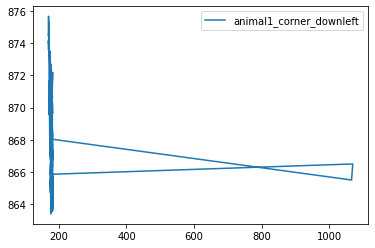

In [50]:
#pick a bodypart and animal

animal = animals[0]
bp = bodyparts[0]
print(f"Picked {animal}, {bp}.")

x_coords, y_coords, likelihood = df[(animal,bp)].values.T

plt.plot(x_coords, y_coords, label = "_".join([animal, bp]))
plt.legend()




You might pick up on some jitters/jumps in the pose estimation here. This is due to the fact that we are looking at unprocessed (raw) data and sometimes the algorithm is not good at estimating the position.

In [67]:
#let's find out how many values are below a minimum likelihood

#for this we can use the likelihood column for each bodypart

likelihood_clm = df[(animal, bp, "likelihood")]

print("INFO: ")
print(f"Range: {likelihood_clm.min()} to {likelihood_clm.max()} with avg {likelihood_clm.mean()} +/- {likelihood_clm.std()}")

threshold = 0.6
print(f"How many frames have a likelihood under {threshold}?")
flt_likelihood_clm = likelihood_clm.values > threshold
print(f"Values below threshold: {(~flt_likelihood_clm).sum()} of {flt_likelihood_clm.shape[0]}; {(~flt_likelihood_clm).sum()/flt_likelihood_clm.shape[0]:0.3f} % ")

INFO: 
Range: 0.3261606693267822 to 0.9993876218795776 with avg 0.9471083873705554 +/- 0.030514268903533537
How many frames have a likelihood under 0.6?
Values below threshold: 25 of 15146; 0.002 % 


We can get rid of these values by removing them and interpolate them. the simplest way of doing this is a linear interpolation (luckily that's already build into pandas).

In [52]:
#first set all values below the threshold to NaN (not a number)
# for simplicity we are doing this in one go for all animals and bodyparts (consistency is key in data science)

#IMPORTANT! Before we do anything with the data, we copy it, so that we keep an original version
df_flt = df.copy(deep = True)
#now, we only work on the copy!
for animal in animals:
  for bodypart in bodyparts: 
    threshold_mask = df[( animal, bodypart, "likelihood")].values < threshold
    print(f"Found {threshold_mask.sum()} values for {animal}, {bodypart}.")
    df_flt[(animal, bodypart, "x")][threshold_mask] = np.NaN
    df_flt[(animal, bodypart, "y")][threshold_mask] = np.NaN

print("Quick overview of the found and replaced values: \n", df_flt.isna().sum())    



Found 4 values for animal1, corner_downleft.
Found 25 values for animal1, corner_downright.
Found 10 values for animal1, corner_upleft.
Found 35 values for animal1, corner_upright.
Found 256 values for animal1, ear_left.
Found 205 values for animal1, ear_right.
Found 38 values for animal1, neck.
Found 310 values for animal1, nose.
Found 12 values for animal1, obj_blackdown.
Found 15146 values for animal1, obj_blackup.
Found 0 values for animal1, obj_white.
Found 150 values for animal1, side_left.
Found 88 values for animal1, side_right.
Found 54 values for animal1, tail_base.
Quick overview of the found and replaced values: 
 individuals  bodyparts         coords    
animal1      corner_upleft     x                10
                               y                10
                               likelihood        0
             corner_upright    x                35
                               y                35
                               likelihood        0
             corne

If both doesn't match, it is very likely that your data was missing some frames already (which is usually the result of a filtering step). So make sure that you are using raw data. if this is on purpose, the next step will clean up those values anyway.

In [53]:
help(df_flt.interpolate)

Help on method interpolate in module pandas.core.frame:

interpolate(method: 'str' = 'linear', axis: 'Axis' = 0, limit: 'int | None' = None, inplace: 'bool' = False, limit_direction: 'str | None' = None, limit_area: 'str | None' = None, downcast: 'str | None' = None, **kwargs) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Fill NaN values using an interpolation method.
    
    Please note that only ``method='linear'`` is supported for
    DataFrame/Series with a MultiIndex.
    
    Parameters
    ----------
    method : str, default 'linear'
        Interpolation technique to use. One of:
    
        * 'linear': Ignore the index and treat the values as equally
          spaced. This is the only method supported on MultiIndexes.
        * 'time': Works on daily and higher resolution data to interpolate
          given length of interval.
        * 'index', 'values': use the actual numerical values of the index.
        * 'pad': Fill in NaNs using existing va

In [54]:
#interpolate the dataframe with this command
df_flt.interpolate(inplace = True)
print("How many NaNs are left? \n")
df_flt.isna().sum()

How many NaNs are left? 



individuals  bodyparts         coords    
animal1      corner_upleft     x                 0
                               y                 0
                               likelihood        0
             corner_upright    x                 0
                               y                 0
                               likelihood        0
             corner_downleft   x                 0
                               y                 0
                               likelihood        0
             corner_downright  x                 0
                               y                 0
                               likelihood        0
             obj_blackup       x             15146
                               y             15146
                               likelihood        0
             obj_blackdown     x                 0
                               y                 0
                               likelihood        0
             obj_white         x        

if there are NaNs left, this is most likely due to the fact that the interpolation runs forward and missing values in the beginning of the dataframe cannot be interpolated. However, we can run interpolate backwards as well, just that due to the nature of movement it does not make sense to begin with it. To work around this, we are now using a different interpolation method which fills in values that are already existing - i.e., the last valid value.

In [71]:
df_flt.interpolate(method = "bfill", limit_direction= "backward", inplace = True)
df_flt

individuals       animal1                                                    \
bodyparts   corner_upleft                        corner_upright               
coords                  x           y likelihood              x           y   
0              178.062973  276.663147   0.999959    1066.456787  274.406464   
1              178.085358  276.630859   0.999959    1066.453491  274.431427   
2              178.091278  276.564606   0.999960    1066.444092  274.439972   
3              178.090576  276.563965   0.999960    1066.467163  274.469147   
4              178.117554  276.529022   0.999960    1066.464478  274.416107   
...                   ...         ...        ...            ...         ...   
15141          177.967834  276.744202   0.999962    1066.517944  274.445892   
15142          177.947479  276.767120   0.999962    1066.517578  274.457153   
15143          177.948700  276.778748   0.999962    1066.601685  274.467773   
15144          177.954178  276.776794   0.999962    1066.597900  274.475006   
15145          177.974396  276.801025   0.999963    1066.461304  274.513702   

individuals                                                    \
bodyparts              corner_downleft                          
coords      likelihood               x           y likelihood   
0             0.999981      180.037231  868.880310   0.907942   
1             0.999981      180.072098  868.883728   0.909742   
2             0.999981      180.045624  868.891479   0.910781   
3             0.999981      180.075516  868.902039   0.911903   
4             0.999981      179.907349  868.898804   0.906794   
...                ...             ...         ...        ...   
15141         0.999981      177.749832  868.881836   0.996716   
15142         0.999981      177.897690  868.753113   0.996295   
15143         0.999981      178.018738  868.621887   0.996004   
15144         0.999981      178.372559  868.386597   0.995202   
15145         0.999981      178.607742  868.385498   0.995175   

individuals                   ...                                     \
bodyparts   corner_downright  ...   ear_left   ear_right               
coords                     x  ... likelihood           x           y   
0                1065.341064  ...   0.002257  333.975800  658.596741   
1                1065.484741  ...   0.002283  333.975800  658.596741   
2                1065.339600  ...   0.002305  333.975800  658.596741   
3                1065.343506  ...   0.002262  333.975800  658.596741   
4                1065.341064  ...   0.002260  333.975800  658.596741   
...                      ...  ...        ...         ...         ...   
15141            1065.397827  ...   0.999588  252.412506  827.684814   
15142            1065.402344  ...   0.998579  255.395401  826.316528   
15143            1065.409790  ...   0.998953  259.882050  824.448303   
15144            1065.404419  ...   0.998673  263.878723  823.729675   
15145            1065.397583  ...   0.998835  268.255127  821.352722   

individuals                                                            \
bodyparts                side_left                         side_right   
coords      likelihood           x           y likelihood           x   
0             0.001311  310.268494  912.438171   0.000764  386.546478   
1             0.001312  310.268494  912.438171   0.000795  386.546478   
2             0.001313  310.268494  912.438171   0.000772  386.546478   
3             0.001265  310.268494  912.438171   0.000766  386.546478   
4             0.001264  310.268494  912.438171   0.000764  386.546478   
...                ...         ...         ...        ...         ...   
15141         0.979102  214.400467  795.266296   0.999077  211.852875   
15142         0.990754  214.488617  795.951355   0.998914  218.807037   
15143         0.997491  215.536758  797.877258   0.999052  220.803116   
15144         0.997174  217.988480  800.477783   0.999057  229.962570   
15145         0.997030  

Let's plot it again and see what happened

In [76]:
print(list(enumerate(bodyparts)))

[(0, 'corner_downleft'), (1, 'corner_downright'), (2, 'corner_upleft'), (3, 'corner_upright'), (4, 'ear_left'), (5, 'ear_right'), (6, 'neck'), (7, 'nose'), (8, 'obj_blackdown'), (9, 'obj_blackup'), (10, 'obj_white'), (11, 'side_left'), (12, 'side_right'), (13, 'tail_base')]


Picked animal1, neck.


d:\Anaconda\envs\analysis_tutorial\lib\site-packages\IPython\core\interactiveshell.py:2915: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


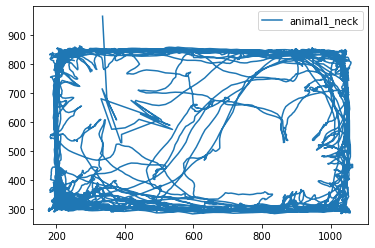

In [77]:
#pick a bodypart and animal

animal = animals[0]
bp = bodyparts[6]
print(f"Picked {animal}, {bp}.")

x_coords, y_coords, likelihood = df_flt[(animal,bp)].values.T

plt.plot(x_coords, y_coords, label = "_".join([animal, bp]))
plt.legend()

Now let's begin with some basic analysis:

If we want to know how far the animal moved across the whole session, we need to calculate the distance it traveled each frame measure by a chosen bodypart and the sum it up.

the distance between each frame is the euclidean distance betwenn timepoint 0 and t + 1

In [78]:
def calc_dist(x1,y1,x2,y2):
  #calculates euclidean distance between two points
  out_array = (np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2))
  return out_array


def calc_distance_between_frames(df):
  # shift coordinates by 1 so that we calculate the distance traveled between the current and the last frame (easier than itering through all rows, believe me)
  # last value gets NaN
  df_shift = df.shift(periods=1)
  # rename each column to "x/y_shifted"
  df_shift.rename(lambda x: x + '_shifted',axis='columns',level=2,inplace=True)

  animals = list(df.columns.get_level_values(0).unique())
  bodyparts = list(df.columns.get_level_values(1).unique())

  for animal in animals:
    for bp in bodyparts:
      x1 = df[(animal,bp,'x')]
      x2 = df_shift[(animal,bp,'x_shifted')]
      y1 = df[(animal,bp,'y')]
      y2 = df_shift[(animal,bp,'y_shifted')]
      dist_series = calc_dist(x1,y1,x2,y2)
      dist_series.name = (animal,bp,'dist')
      df = pd.concat([df,dist_series],axis=1)
  # resorting will change the original order, so only do this at the end if you really have to
  # df = df.reindex(columns=sorted(df.columns))
  return df



In [79]:
df_calc = df_flt.copy(deep = True)

df_calc = calc_distance_between_frames(df_calc)
# this will add a distance column in the same format to the original data.
#if we want to only look at the distance columns, we can drop all others:
df_dist = df_calc.drop(columns = ["x", "y", "likelihood"], level = 2)

In [58]:
print(f"Distance traveled in px across the whole session:")
df_dist.sum()

Distance traveled in px across the whole session:


individuals  bodyparts         coords
animal1      corner_upleft     dist       2889.758799
             corner_upright    dist       1389.263705
             corner_downleft   dist       1552.010971
             corner_downright  dist       3640.497876
             obj_blackup       dist          0.000000
             obj_blackdown     dist        682.367580
             obj_white         dist        313.004374
             nose              dist      93125.107620
             neck              dist      72878.350772
             tail_base         dist      67976.471204
             ear_left          dist      77732.472773
             ear_right         dist      77155.640539
             side_left         dist      71401.730137
             side_right        dist      69260.603730
dtype: float64

If we know the length of an object in the video in px and in cm, we can easily convert this into cm.

If we know the fps of the video recording, we can also get some information about the time/speed etc.

In [59]:
obj_length_px = 10 #add your value
obj_length_cm = 1 #add your value
px_to_cm = obj_length_px/obj_length_cm

df_dist_cm = df_dist / px_to_cm 

print(f"Total distance travelled per bodypart (cm): \n {df_dist_cm.sum()}")

Total distance travelled per bodypart (cm): 
 individuals  bodyparts         coords
animal1      corner_upleft     dist       288.975880
             corner_upright    dist       138.926371
             corner_downleft   dist       155.201097
             corner_downright  dist       364.049788
             obj_blackup       dist         0.000000
             obj_blackdown     dist        68.236758
             obj_white         dist        31.300437
             nose              dist      9312.510762
             neck              dist      7287.835077
             tail_base         dist      6797.647120
             ear_left          dist      7773.247277
             ear_right         dist      7715.564054
             side_left         dist      7140.173014
             side_right        dist      6926.060373
dtype: float64


In [60]:
fps = 30 # add your value

print(f"Average speed (cm/s) per bodypart: \n {df_dist_cm.mean()/fps}")

Average speed (cm/s) per bodypart: 
 individuals  bodyparts         coords
animal1      corner_upleft     dist      0.000636
             corner_upright    dist      0.000306
             corner_downleft   dist      0.000342
             corner_downright  dist      0.000801
             obj_blackup       dist           NaN
             obj_blackdown     dist      0.000150
             obj_white         dist      0.000069
             nose              dist      0.020529
             neck              dist      0.016067
             tail_base         dist      0.014987
             ear_left          dist      0.017139
             ear_right         dist      0.017011
             side_left         dist      0.015739
             side_right        dist      0.015271
dtype: float64


You can also plot this, to see changes across time:

In [80]:
print(list(enumerate(bodyparts)))

[(0, 'corner_downleft'), (1, 'corner_downright'), (2, 'corner_upleft'), (3, 'corner_upright'), (4, 'ear_left'), (5, 'ear_right'), (6, 'neck'), (7, 'nose'), (8, 'obj_blackdown'), (9, 'obj_blackup'), (10, 'obj_white'), (11, 'side_left'), (12, 'side_right'), (13, 'tail_base')]


Picked animal1, neck.


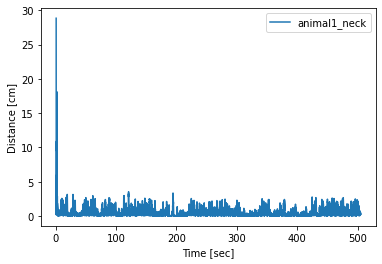

In [81]:
animal = animals[0]
bp = bodyparts[6]
print(f"Picked {animal}, {bp}.")

y = df_dist_cm[(animal,bp, "dist")].values
x = np.arange(y_coords.shape[0])/fps

plt.plot(x, y, label = "_".join([animal, bp]))
plt.ylabel("Distance [cm]")
plt.xlabel("Time [sec]")
plt.legend()

Now, if you are interested to see whether your animal is interacting with an object or other thing of interest, we can use the same functions to calculate the animals distance to it. Assuming that proximity or distance to a point indicates the animals behavioral reaction to it.

In [62]:
#take the calculate distance function from above and add in an object point instead of the next frame

def calc_distance_from_point(df, point: tuple):
  
  animals = list(df.columns.get_level_values(0).unique())
  bodyparts = list(df.columns.get_level_values(1).unique())

  for animal in animals:
    for bp in bodyparts:
      x1 = df[(animal,bp,'x')]
      x2 = point[0]
      y1 = df[(animal,bp,'y')]
      y2 = point[1]
      dist_series = calc_dist(x1,y1,x2,y2)
      dist_series.name = (animal,bp,'point_dist')
      df = pd.concat([df,dist_series],axis=1)

  return df

In [83]:
obj_point = (0,0)
df_obj = df_flt.copy(deep = True)
df_obj = calc_distance_from_point(df_obj, point = obj_point)

# this will add a distance column in the same format to the original data.
#if we want to only look at the distance columns, we can drop all others:
df_obj = df_obj.drop(columns = ["x", "y", "likelihood"], level = 2)
df_obj

individuals       animal1                                                  \
bodyparts   corner_upleft corner_upright corner_downleft corner_downright   
coords         point_dist     point_dist      point_dist       point_dist   
0              329.012035    1101.194345      887.336688      1373.015080   
1              328.997001    1101.197374      887.347110      1373.096880   
2              328.944501    1101.190401      887.349328      1372.993151   
3              328.943582    1101.220015      887.365733      1372.994142   
4              328.928812    1101.204196      887.328454      1372.965450   
...                   ...            ...             ...              ...   
15141          329.028727    1101.263399      886.876907      1373.078143   
15142          329.036995    1101.265850      886.780446      1373.085652   
15143          329.047436    1101.349950      886.676183      1373.103635   
15144          329.048755    1101.348088      886.516808      1373.102702   
15145          329.080071    1101.225447      886.563082      1373.081997   

individuals                                                                   \
bodyparts   obj_blackup obj_blackdown    obj_white         nose         neck   
coords       point_dist    point_dist   point_dist   point_dist   point_dist   
0                   NaN    777.018405  1002.644412  1081.016222  1020.617857   
1                   NaN    777.023840  1002.637674  1081.016222  1020.617857   
2                   NaN    777.037256  1002.643144  1081.016222  1020.617857   
3                   NaN    777.055436  1002.644025  1081.016222  1020.617857   
4                   NaN    777.048023  1002.637317  1081.016222  1020.617857   
...                 ...           ...          ...          ...          ...   
15141               NaN    777.071853  1002.646176   838.698858   848.658655   
15142               NaN    776.987265  1002.651838   840.324292   849.586369   
15143               NaN    777.006628  1002.650898   839.427723   849.485927   
15144               NaN    777.017305  1002.638905   839.233519   849.846499   
15145               NaN    777.040542  1002.647075   838.494063   849.641905   

individuals                                                              
bodyparts     tail_base    ear_left   ear_right   side_left  side_right  
coords       point_dist  point_dist  point_dist  point_dist  point_dist  
0            989.805914  724.704681  738.437202  963.747869  741.459274  
1            989.805914  724.704681  738.437202  963.747869  741.459274  
2            989.805914  724.704681  738.437202  963.747869  741.459274  
3            989.805914  724.704681  738.437202  963.747869  741.459274  
4            989.805914  724.704681  738.437202  963.747869  741.459274  
...                 ...         ...         ...         ...         ...  
15141        809.330308  827.152092  865.317413  823.660150  866.410495  
15142        812.156894  825.813862  864.884857  824.344543  868.646248  
15143        814.816734  824.741013  864.438364  826.476989  869.315131  
15144        818.770783  825.232434  864.963906  829.628627  874.517631  
15145        822.801664  825.585933  864.049251  831.011156  873.688573  

[15146 rows x 14 columns]

I can use this to define a threshold (proximity) to that point as indicator that the animal is behaving in a certain way (e.g. explores the object). Similiar to the likelihood threshold i can use the following function:

In [84]:
prox_threshold = 400 #this is still in px but you can also convert everything into centimeter (see above conversion)

#this assumes a circular region of interest
df_threshold = df_obj < prox_threshold

#the result is a boolean mask for each frame
df_threshold

individuals       animal1                                                  \
bodyparts   corner_upleft corner_upright corner_downleft corner_downright   
coords         point_dist     point_dist      point_dist       point_dist   
0                    True          False           False            False   
1                    True          False           False            False   
2                    True          False           False            False   
3                    True          False           False            False   
4                    True          False           False            False   
...                   ...            ...             ...              ...   
15141                True          False           False            False   
15142                True          False           False            False   
15143                True          False           False            False   
15144                True          False           False            False   
15145                True          False           False            False   

individuals                                                             \
bodyparts   obj_blackup obj_blackdown  obj_white       nose       neck   
coords       point_dist    point_dist point_dist point_dist point_dist   
0                 False         False      False      False      False   
1                 False         False      False      False      False   
2                 False         False      False      False      False   
3                 False         False      False      False      False   
4                 False         False      False      False      False   
...                 ...           ...        ...        ...        ...   
15141             False         False      False      False      False   
15142             False         False      False      False      False   
15143             False         False      False      False      False   
15144             False         False      False      False      False   
15145             False         False      False      False      False   

individuals                                                         
bodyparts    tail_base   ear_left  ear_right  side_left side_right  
coords      point_dist point_dist point_dist point_dist point_dist  
0                False      False      False      False      False  
1                False      False      False      False      False  
2                False      False      False      False      False  
3                False      False      False      False      False  
4                False      False      False      False      False  
...                ...        ...        ...        ...        ...  
15141            False      False      False      False      False  
15142            False      False      False      False      False  
15143            False      False      False      False      False  
15144            False      False      False      False      False  
15145            False      False      False      False      False  

[15146 rows x 14 columns]

In [85]:
print(f"Total time spent close to point (total session: {df_threshold.shape[0]/fps:.2f} sec): \n", df_threshold.sum()/fps)

Total time spent close to point (total session: 504.87 sec): 
 individuals  bodyparts         coords    
animal1      corner_upleft     point_dist    504.866667
             corner_upright    point_dist      0.000000
             corner_downleft   point_dist      0.000000
             corner_downright  point_dist      0.000000
             obj_blackup       point_dist      0.000000
             obj_blackdown     point_dist      0.000000
             obj_white         point_dist      0.000000
             nose              point_dist     25.466667
             neck              point_dist     49.033333
             tail_base         point_dist    132.000000
             ear_left          point_dist     40.800000
             ear_right         point_dist     45.533333
             side_left         point_dist     99.366667
             side_right        point_dist    111.866667
dtype: float64


You can also plot the events across time:

Picked animal1, neck.


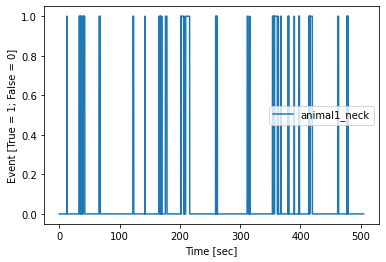

In [87]:
animal = animals[0]
bp = bodyparts[6]
print(f"Picked {animal}, {bp}.")

y = df_threshold[(animal,bp, "point_dist")].values
x = np.arange(y_coords.shape[0])/fps

plt.plot(x, y, label = "_".join([animal, bp]))
plt.ylabel("Event [True = 1; False = 0]")
plt.xlabel("Time [sec]")
plt.legend()